# All in one


### data preprocess
Here I extract MFCC from the audio data (you can ignore it since the processed result - `data.json` is already there)

In [1]:
from utils.preprocess import load_audio
from utils.params import Params

params = Params("hparams.yaml", "preprocess")
load_audio(params)

Processing pop


100%|██████████| 100/100 [00:40<00:00,  2.49it/s]


Processing metal


100%|██████████| 100/100 [00:40<00:00,  2.49it/s]


Processing disco


100%|██████████| 100/100 [00:39<00:00,  2.52it/s]


Processing blues


100%|██████████| 100/100 [00:39<00:00,  2.50it/s]


Processing reggae


100%|██████████| 100/100 [00:41<00:00,  2.39it/s]


Processing classical


100%|██████████| 100/100 [00:39<00:00,  2.53it/s]


Processing rock


100%|██████████| 100/100 [00:39<00:00,  2.53it/s]


Processing hiphop


100%|██████████| 100/100 [00:40<00:00,  2.47it/s]


Processing country


100%|██████████| 100/100 [00:36<00:00,  2.72it/s]


Processing jazz


100%|██████████| 100/100 [00:35<00:00,  2.80it/s]


Saving data to data.json


### Function to draw loss chart

In [2]:
import json
import matplotlib.pyplot as plt

def draw_loss_graph(log_path: str):
    with open(log_path, 'r') as f:
        loss = json.load(f)
    train_loss = [l[1]['train_loss'] for l in loss.items()]
    val_loss = [l[1]['val_loss'] for l in loss.items()]
    plt.plot(train_loss, label='train')
    plt.plot(val_loss, label='valid')
    plt.legend()
    plt.show()

### Clear all logs & checkpoints (Optional)

In [3]:
! bash clear.sh

### Train CNN model

In [6]:
!python train.py CNN

Loading data from data.json
100%|█████████████████████████████████████████| 219/219 [00:11<00:00, 19.70it/s]
EPOCH 1, train_loss: 1.81558276480491, val_loss: 1.4401297569274902, val_acc: 0.4993324432576769
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 20.73it/s]
EPOCH 2, train_loss: 1.4614516174027679, val_loss: 1.2601886987686157, val_acc: 0.5534045393858478
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 21.15it/s]
EPOCH 3, train_loss: 1.3109224832386053, val_loss: 1.2354435920715332, val_acc: 0.5610814419225634
100%|█████████████████████████████████████████| 219/219 [00:11<00:00, 19.47it/s]
EPOCH 4, train_loss: 1.1997817683657375, val_loss: 1.1243785619735718, val_acc: 0.6108144192256342
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 21.02it/s]
EPOCH 5, train_loss: 1.1159710378275005, val_loss: 1.0902661085128784, val_acc: 0.6144859813084113
100%|█████████████████████████████████████████| 219/219 [00:11<00:00, 19.3

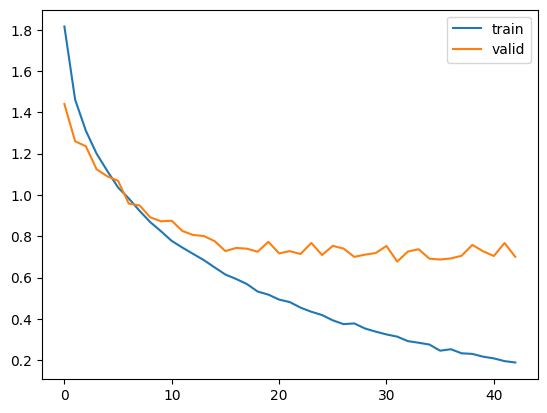

In [7]:
draw_loss_graph('logs/cnn.json')

### Train MLP model

In [11]:
!python train.py MLP

Loading data from data.json
100%|████████████████████████████████████████| 219/219 [00:00<00:00, 268.49it/s]
EPOCH 1, train_loss: 2.2221076220547387, val_loss: 2.14411997795105, val_acc: 0.308411214953271
100%|████████████████████████████████████████| 219/219 [00:00<00:00, 285.12it/s]
EPOCH 2, train_loss: 2.1466894215400067, val_loss: 2.1063425540924072, val_acc: 0.34579439252336447
100%|████████████████████████████████████████| 219/219 [00:00<00:00, 275.41it/s]
EPOCH 3, train_loss: 2.1282472331589517, val_loss: 2.0730135440826416, val_acc: 0.3818424566088118
100%|████████████████████████████████████████| 219/219 [00:00<00:00, 281.22it/s]
EPOCH 4, train_loss: 2.1086821659989314, val_loss: 2.0667166709899902, val_acc: 0.3871829105473965
100%|████████████████████████████████████████| 219/219 [00:00<00:00, 243.59it/s]
EPOCH 5, train_loss: 2.0921727517329223, val_loss: 2.0688540935516357, val_acc: 0.38317757009345793
100%|████████████████████████████████████████| 219/219 [00:00<00:00, 266.

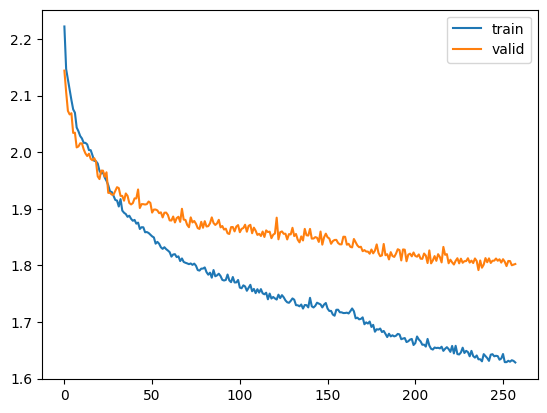

In [12]:
draw_loss_graph('logs/mlp.json')

# LSTM Model

In [13]:
!python train.py LSTM

Loading data from data.json
100%|█████████████████████████████████████████| 219/219 [00:12<00:00, 18.02it/s]
EPOCH 1, train_loss: 2.3063138799929837, val_loss: 2.2757210731506348, val_acc: 0.17222963951935916
100%|█████████████████████████████████████████| 219/219 [00:11<00:00, 18.36it/s]
EPOCH 2, train_loss: 2.241350167388216, val_loss: 2.2026913166046143, val_acc: 0.25567423230974634
100%|█████████████████████████████████████████| 219/219 [00:11<00:00, 18.31it/s]
EPOCH 3, train_loss: 2.1875992685282997, val_loss: 2.154934883117676, val_acc: 0.3000667556742323
100%|█████████████████████████████████████████| 219/219 [00:12<00:00, 17.91it/s]
EPOCH 4, train_loss: 2.1530713969414386, val_loss: 2.130958080291748, val_acc: 0.31942590120160214
100%|█████████████████████████████████████████| 219/219 [00:11<00:00, 18.50it/s]
EPOCH 5, train_loss: 2.135667783404709, val_loss: 2.1142501831054688, val_acc: 0.3604806408544726
100%|█████████████████████████████████████████| 219/219 [00:11<00:00, 18.

In [ ]:
draw_loss_graph('logs/lstm.json')